In [18]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Example dataset
!kaggle datasets download -d zillow/zecon
!unzip zecon.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/zillow/zecon
License(s): copyright-authors
zecon.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  zecon.zip
replace City_time_series.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [21]:
df = pd.read_csv('State_time_series.csv')
df.head()


,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


In [22]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           13212 non-null  object 
 1   RegionName                                                     13212 non-null  object 
 2   DaysOnZillow_AllHomes                                          4845 non-null   float64
 3   InventorySeasonallyAdjusted_AllHomes                           4896 non-null   float64
 4   InventoryRaw_AllHomes                                          4896 non-null   float64
 5   MedianListingPricePerSqft_1Bedroom                             3586 non-null   float64
 6   MedianListingPricePerSqft_2Bedroom                             4534 non-null   float64
 7   MedianListingPricePerSqft_3Bedroom                        

,0
Date,0
RegionName,0
DaysOnZillow_AllHomes,8367
InventorySeasonallyAdjusted_AllHomes,8316
InventoryRaw_AllHomes,8316
...,...
ZRI_AllHomes,8958
ZRI_AllHomesPlusMultifamily,8876
ZriPerSqft_AllHomes,8876
Zri_MultiFamilyResidenceRental,8876


In [23]:
df = df.dropna()  # or fillna() if you prefer to fill missing values
df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
10669,2013-12-31,California,73.75,71512.0,68428.0,335.704695,242.494226,219.166788,221.204285,234.005566,...,196600.0,361600.0,395100.0,402000.0,748700.0,2010.0,1983.0,1.306,1865.0,2023.0
10721,2014-01-31,California,78.75,72514.0,62335.0,328.947368,237.630208,211.609355,214.424301,227.272727,...,199300.0,363500.0,397600.0,404700.0,753100.0,2016.0,1988.0,1.308,1868.0,2027.0
10773,2014-02-28,California,75.25,73914.0,66856.0,329.588939,241.525374,217.971530,221.469515,230.007801,...,201900.0,366100.0,400400.0,407400.0,758300.0,2021.0,1993.0,1.310,1872.0,2032.0
10825,2014-03-31,California,66.50,76319.0,70808.0,330.149545,252.028349,226.668322,228.559751,237.068966,...,204400.0,369400.0,403400.0,410300.0,763600.0,2024.0,1996.0,1.314,1875.0,2035.0
10877,2014-04-30,California,62.25,79265.0,76157.0,344.749547,260.904074,235.204941,235.336713,244.553135,...,206700.0,372000.0,406100.0,413100.0,768200.0,2029.0,2000.0,1.318,1878.0,2039.0


In [24]:
X = df[['DaysOnZillow_AllHomes', 'InventorySeasonallyAdjusted_AllHomes']]  # Replace with actual feature names
y = df['InventoryRaw_AllHomes']  # Replace with the actual target variable


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)


Mean Squared Error: 21938946.116754506
R^2 Score: 0.9645044527634179


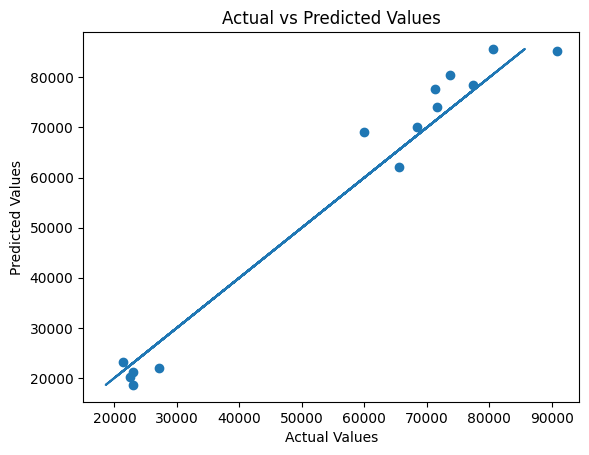

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot(y_pred,y_pred)
plt.show()
